In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

In [20]:
def call(S, K, prem):
    return np.array(list(map(lambda x: max(x-K, 0) - prem, S)))

In [21]:
def put(S, K, prem):
    return np.array(list(map(lambda x: max(K-x, 0) - prem, S)))

In [22]:
S = np.arange(80, 120)

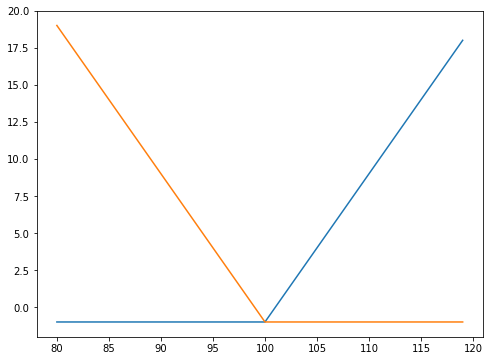

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(S, call(S, 100, 1))
plt.plot(S, put(S, 100, 1));

In [24]:
def iron_condor(S, K1, K2, K3, K4, p1, p2, p3, p4):
    o1 = put(S, K1, p1)
    o2 = put(S, K2, p2)
    o3 = call(S, K3, p3)
    o4 = call(S, K4, p4)
    
    return o1 - o2 - o3 + o4

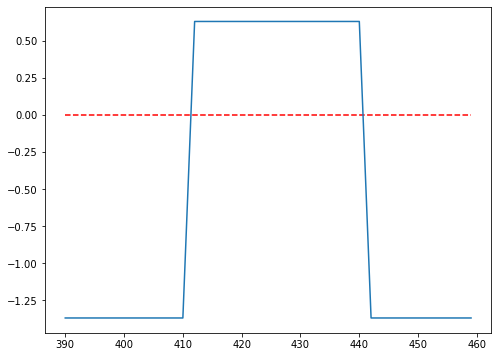

In [25]:
S = np.arange(390, 460)
plt.figure(figsize=(8, 6))
plt.plot(S, iron_condor(S, 410, 412, 440, 442, 0.97, 1.09, 1.08, 0.57))
plt.hlines(0, S[0], S[-1], colors='r', linestyles='--');

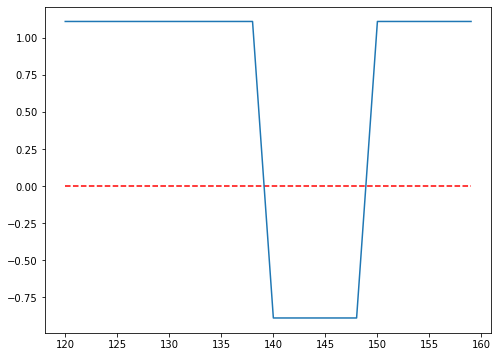

In [30]:
S = np.arange(120, 160)
plt.figure(figsize=(8, 6))
plt.plot(S, -iron_condor(S, 138, 140, 148, 150, 0.86, 1.29, 1.46, 1))
plt.hlines(0, S[0], S[-1], colors='r', linestyles='--');

In [3]:
now = datetime.now() # current date and time
start_date = '2010-01-01'
end_date = now.strftime("%Y-%m-%d")

aapl = yf.Ticker("AAPL")
df = aapl.history(start=start_date, end=end_date)

In [4]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2009-12-31,6.545397,6.552154,6.466470,6.471691,352410800,0.0,0.0
2010-01-04,6.554610,6.587470,6.522363,6.572422,493729600,0.0,0.0
2010-01-05,6.590541,6.620944,6.549081,6.583784,601904800,0.0,0.0
2010-01-06,6.583784,6.609889,6.472304,6.479061,552160000,0.0,0.0
2010-01-07,6.503014,6.510692,6.420095,6.467082,477131200,0.0,0.0
...,...,...,...,...,...,...,...
2021-06-29,134.800003,136.490005,134.350006,136.330002,64556100,0.0,0.0
2021-06-30,136.169998,137.410004,135.869995,136.960007,63261400,0.0,0.0
2021-07-01,136.600006,137.330002,135.759995,137.270004,52485800,0.0,0.0


In [5]:
df['2020':]

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02,73.192005,74.269234,72.932584,74.207466,135480400,0.0,0.0
2020-01-03,73.416844,74.264292,73.256250,73.486023,146322800,0.0,0.0
2020-01-06,72.586693,74.111111,72.329739,74.071579,118387200,0.0,0.0
2020-01-07,74.081460,74.343354,73.498379,73.723213,108872000,0.0,0.0
2020-01-08,73.419317,75.217987,73.419317,74.909149,132079200,0.0,0.0
...,...,...,...,...,...,...,...
2021-06-29,134.800003,136.490005,134.350006,136.330002,64556100,0.0,0.0
2021-06-30,136.169998,137.410004,135.869995,136.960007,63261400,0.0,0.0
2021-07-01,136.600006,137.330002,135.759995,137.270004,52485800,0.0,0.0


In [6]:
import measures

In [7]:
rets = df['Close'].pct_change().dropna()

In [8]:
rets

Date
2010-01-04    0.015565
2010-01-05    0.001729
2010-01-06   -0.015906
2010-01-07   -0.001849
2010-01-08    0.006648
                ...   
2021-06-29    0.011500
2021-06-30    0.004621
2021-07-01    0.002263
2021-07-02    0.019596
2021-07-06    0.014718
Name: Close, Length: 2896, dtype: float64

In [10]:
mu = measures.annualize_rets(rets, 252)
vol = measures.annualize_vol(rets, 252)

In [11]:
mu, vol

(0.30833239875884466, 0.282666454693406)

In [17]:
vols = rets.rolling(30).apply(lambda x: measures.annualize_vol(x, 252)).dropna()

In [15]:
vols = df['Close'].rolling(30).std().dropna()

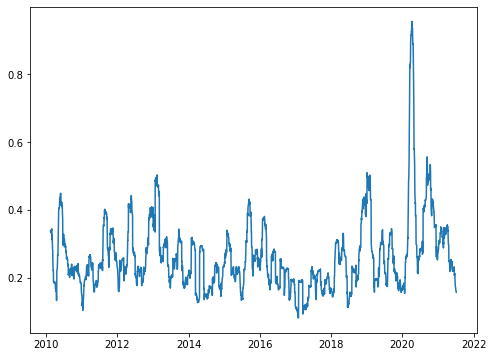

In [18]:
plt.figure(figsize=(8, 6))
plt.plot(vols);